In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [70]:
def plot_double(title, interpolation_val, interpolation_final, key, best_val):
    val = interpolation_val[['freq', key]]
    val['label'] = 'valid on {}'.format(key)
    final = interpolation_final[['freq', key]]
    final['label'] = 'final on {}'.format(key)
    fatality = pd.concat([val, final])
    plt.figure()
    graph = sns.lineplot(x="freq", y=key, hue='label', data=fatality)
    if key == "valid":
        graph.axhline(linewidth=0.5, y=best_val, color='black')
    graph.set_title(title, fontsize=16)
    plt.ylabel("accuracy")
    

In [71]:
def plot_single(interpolation, key, mode, best_val):
    fatality = interpolation[['freq', key]]
    label = "{} on {}".format(mode, key)
    plt.figure()
    graph = sns.lineplot(x="freq", y=key, label=label, data=fatality)
    graph.axhline(linewidth=0.5, y=best_val, color='black')
    plt.ylabel("accuracy")
#     plt.savefig('{}_{}.png'.format(mode, key))

In [72]:
def get_combined_plots(title, interpolation_val, interpolation_final, best_val):
    for key in ['train', 'valid']:
        plot_double(title, interpolation_val, interpolation_final, key, best_val)

In [77]:
def get_single_plot(interpolation_df, mode, best_val):
    for key in ['train', 'valid']:
        plot_single(interpolation_df, key, mode, best_val)

In [78]:
def get_combined_plots_from_path(title, path_val, path_final, best_val):
    interpolation_val = pd.read_csv(path_val)
    interpolation_final = pd.read_csv(path_final)
    get_combined_plots(title, interpolation_val, interpolation_final, best_val)

In [79]:
def get_plot_AB_from_path(path, num_steps, best_val):
    temp_df = pd.read_csv(path_interpolation_AB)
    for step in range(1, num_steps):
        f = 0.1*step
        current_df = temp_df.loc[lambda df: df['freq1'] == f, ['freq2', 'train', 'valid']]
        current_df = current_df.rename({'freq2': 'freq'}, axis=1)
        get_single_plot(current_df, "{:.1f}A -> {:.1f}B".format(f, f), best_val)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


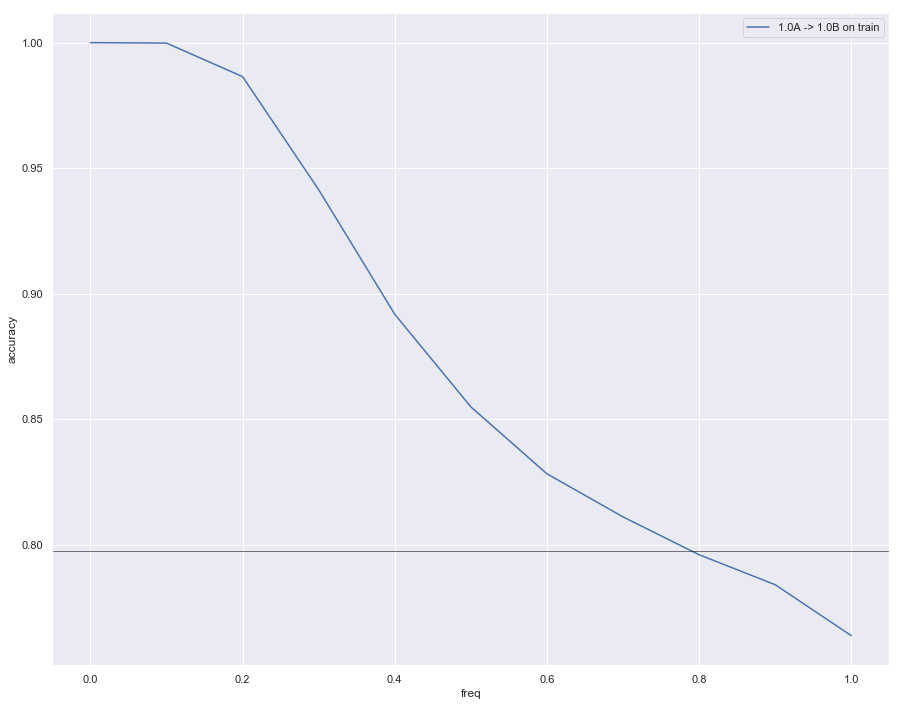

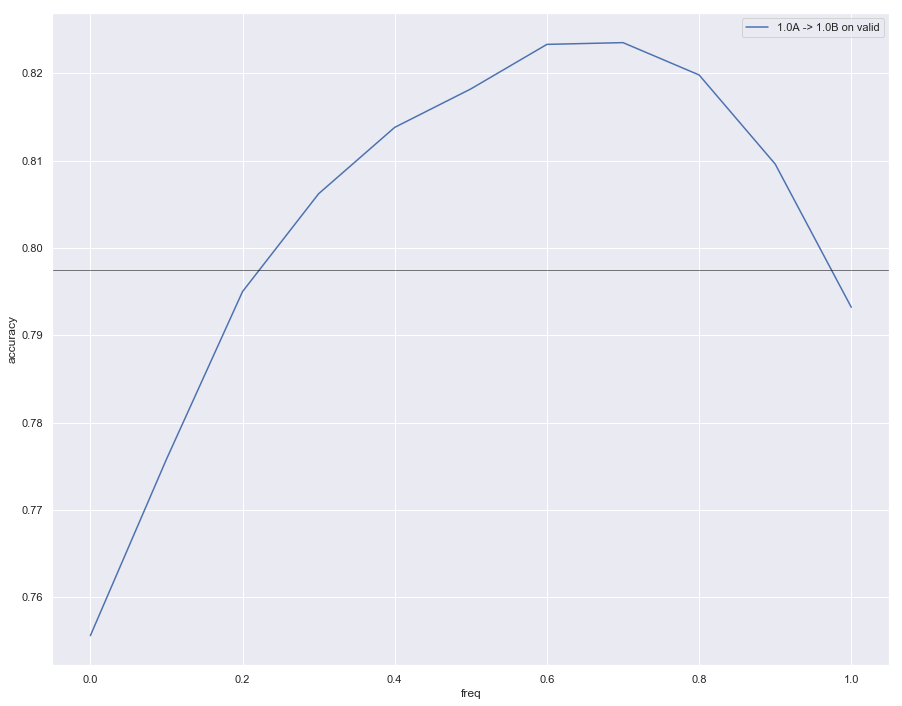

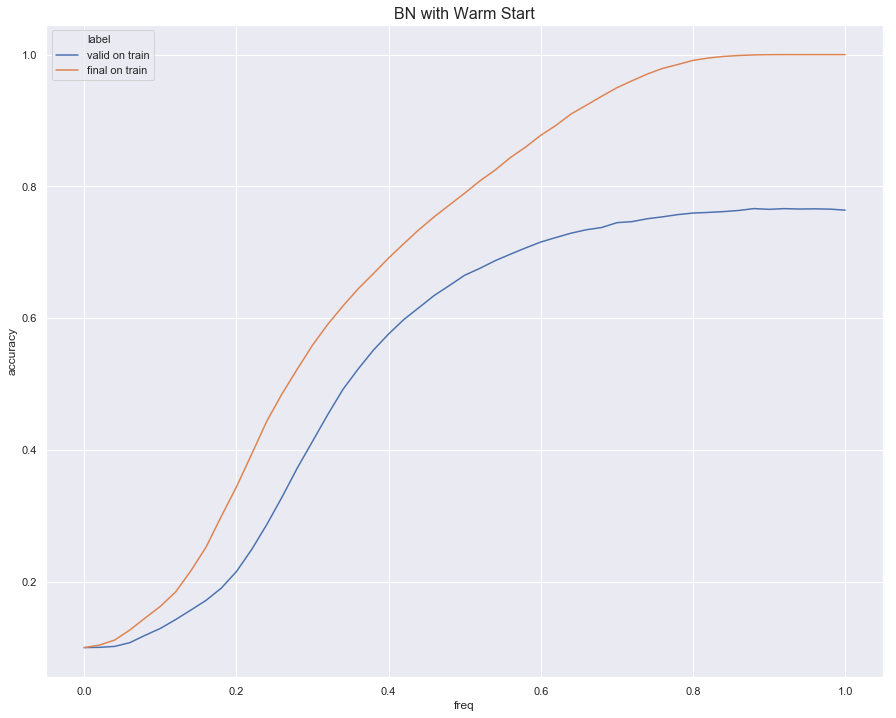

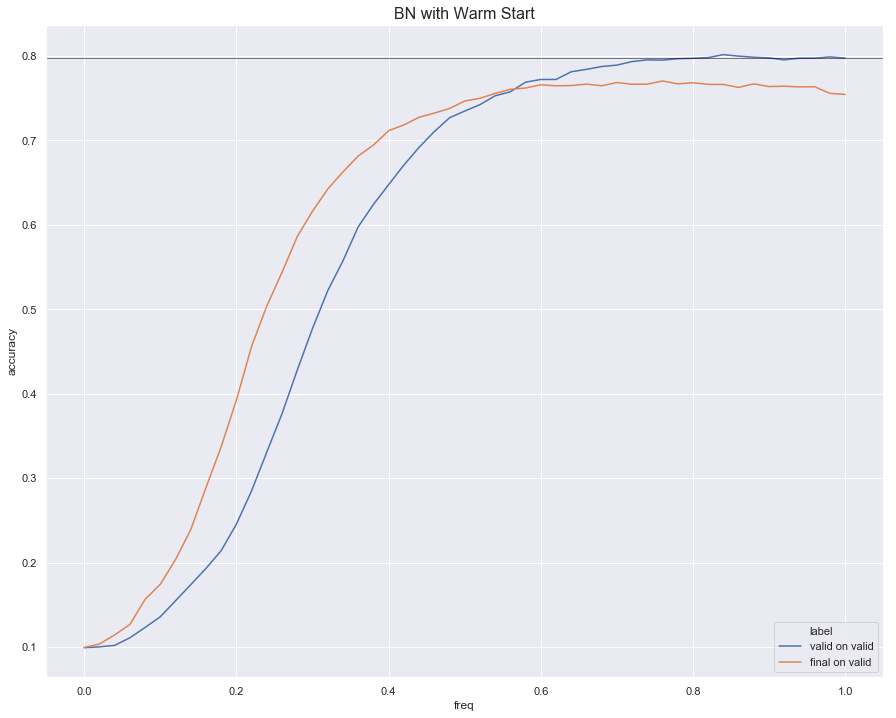

In [80]:
# to set up
path = '../crazy'
BEST_VALID_SCORE = 0.7975
TITLE = "BN with Warm Start"
NUM_STEPS = 10

sns.set(rc={'figure.figsize':(15,12)})
path_valid = os.path.join(path, 'interpolation_val.csv')
path_final = os.path.join(path, 'interpolation_final.csv')

get_single_plot(pd.read_csv(os.path.join(path, 'interpolation_AB_last.csv')), "1.0A -> 1.0B", BEST_VALID_SCORE)
# path_interpolation_AB = os.path.join(path, 'interpolation_AB.csv')

# get_plot_AB(path_interpolation_AB, BEST_VALID_SCORE)
# get_single_plot(path_valid, "valid")
# get_single_plot(path_final, "final")

get_combined_plots_from_path(TITLE, path_valid, path_final, BEST_VALID_SCORE)
